The dataset provided is a one and half years of representative customer's data from Santander bank spanning 2015-01-28 to 2016-06-28. 

The goal is to determine what 
i) Segment customers belong to
ii) products NEW customers will get from the bank in the period 2016-05-28 to 2016-06-28. 

#### Let us first load the modules and data required to understand the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'bankMadridNew.csv', low_memory=False )
print("Dimensions of the dataset" , df.shape)

Dimensions of the dataset (190455, 48)


In [31]:
np.random.seed(1001) 

The columns are in Spanish we will rename columns for ease of understanding.

In [2]:
df.columns = ['Partition_id','customer_code','employee_index','customer_residence','customer_gender','customer_age','first_contract_date','new_customer_index','customer_seniority','customer_type','last_date_as_primary_customer','customer_type_month_beg','customer_relation_type','residence_index','foreigner_index','spouse_index','channel_used','deceased_index','address_type','province_code','province_name','activity_type','gross_income','segmentation','saving_Account','guarantees','current_Accounts','derivative_account','payroll_Account','junior_Account','joint_account','individual_Account','individual_Plus','short_term','medium_term','long_term','e_account','Funds','Mortgage','Pensions','Loans','Taxes','credit_Card','securities','home_Account','payroll','Pensions_2','direct_Debit']
df.head()

,Partition_id,customer_code,employee_index,customer_residence,customer_gender,customer_age,first_contract_date,new_customer_index,customer_seniority,customer_type,...,Mortgage,Pensions,Loans,Taxes,credit_Card,securities,home_Account,payroll,Pensions_2,direct_Debit
0,2015-01-28,1042509,N,ES,V,20,2012-08-03,1.0,3,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1014660,N,ES,H,32,2012-05-07,1.0,4,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1132935,N,ES,V,38,2013-05-03,1.0,2,1.0,...,0,0,0,0,0,0,0,NaN,NaN,0
3,2015-01-28,1110925,N,ES,V,29,2012-12-10,1.0,5,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1118340,N,ES,V,31,2013-01-17,1.0,3,1.0,...,0,0,0,0,0,0,0,NaN,NaN,0


### Missing Values check
The number of rows is quite large around 190k. We will assess if there are missing values and if they can be removed. 

In [3]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,column_name,missing_count
4,customer_gender,12
45,payroll,41
46,Pensions_2,41
11,customer_type_month_beg,27711
12,customer_relation_type,27711
23,segmentation,31507
16,channel_used,31599
22,gross_income,132357
10,last_date_as_primary_customer,187746
15,spouse_index,190391


#### Remove rows with null values 
Based on the values above, we remove rows where gross_income, channel_used, segmentation, customer_relation_type, customer_type_month_beg, pensions_2 and customer_gender is null. Living and local customers will be included in our analysis.

In [4]:
dMadridNewCustomer = df[~df['gross_income'].isnull()] #Only rows where there is gross income
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['channel_used'].isnull()] #Only rows where there is channel used
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['segmentation'].isnull()] #Only rows where there is segementation data
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['customer_relation_type'].isnull()] # Only accounts with customer_relation_type data filled
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['customer_type_month_beg'].isnull()] # Only accounts with customer_type_month_beg data filled
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['payroll'].isnull()] # Only accounts with payroll data filled
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['Pensions_2'].isnull()] # Only accounts with payroll data filled
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['customer_gender'].isnull()] #Only rows where there is segementation data

# Only Living customers
dMadridNewCustomer = dMadridNewCustomer[dMadridNewCustomer['deceased_index'] == 'N']
# Only locals
dMadridNewCustomer = dMadridNewCustomer[dMadridNewCustomer['foreigner_index'] == 'N']
dMadridNewCustomer.shape

(47968, 48)

## Remove data where is no value in the following columns
These columns indicate all the available accounts to the customer. 

In [5]:
dMadridNewCustomer = dMadridNewCustomer[~((dMadridNewCustomer['current_Accounts']==0) & (dMadridNewCustomer['derivative_account']==0) 
                    & (dMadridNewCustomer['payroll_Account']==0) & (dMadridNewCustomer['junior_Account']==0)
                    & (dMadridNewCustomer['joint_account']==0) & (dMadridNewCustomer['individual_Account']==0)
                    & (dMadridNewCustomer['individual_Plus']==0) & (dMadridNewCustomer['short_term']==0)
                    & (dMadridNewCustomer['medium_term']==0) & (dMadridNewCustomer['long_term']==0)
                    & (dMadridNewCustomer['e_account']==0) & (dMadridNewCustomer['Funds']==0)
                    & (dMadridNewCustomer['Mortgage']==0) & (dMadridNewCustomer['Pensions']==0)
                    & (dMadridNewCustomer['Taxes']==0) & (dMadridNewCustomer['credit_Card']==0)
                    & (dMadridNewCustomer['securities']==0) & (dMadridNewCustomer['payroll']==0)
                    & (dMadridNewCustomer['Pensions_2']==0) & (dMadridNewCustomer['direct_Debit']==0))
                   ]

#### Get an understanding of the data types

In [6]:
dtype_df = dMadridNewCustomer.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,25
1,float64,8
2,object,15


#### Integer Columns Analysis

In [7]:
unique_values_dict = {}
for col in dMadridNewCustomer.columns:
    if col in dtype_df[dtype_df['Column Type'] != 'object']['Count'].values:
        unique_value = str(dMadridNewCustomer[col].unique().tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Column:",columns ," containing the unique values : ", unique_val)
    print("--------------------------------------------------")
# customer_gender varón o hembra

Column: ['customer_code']  containing the unique values :  [1042509, 1014660, 1110925, 885751, 1265863, 1253148, 1365964, 1339579, 1327604, 1326497, 1216048, 1245452, 1250566, 1237715, 1195171, 294949, 297062, 401314, 399296, 352387, 83966, 46609, 180903, 138547, 686306, 731928, 670744, 754339, 809665, 485405, 575636, 605562, 522550, 523733, 562340, 517741, 535614, 525304, 522957, 527090, 598127, 622250, 616552, 619201, 617289, 579459, 582195, 570079, 571393, 593121, 594116, 596212, 451352, 444052, 455885, 419840, 505811, 466706, 484623, 478763, 806636, 793212, 818091, 810199, 759310, 759508, 759507, 787496, 786754, 785822, 782933, 863902, 884807, 834668, 835920, 836238, 664089, 663594, 669662, 658507, 662661, 660087, 681127, 680548, 641506, 650219, 650318, 656001, 647070, 731708, 752077, 740419, 693597, 693819, 690622, 721232, 705001, 149230, 128878, 120238, 139698, 132830, 191427, 215048, 214597, 178489, 178651, 53093, 61508, 16254, 34119, 105558, 76614, 91600, 351267, 359710, 361702

There are columns with one unique value, we can exclude from our modeling step. province_code, new_customer_index, address_type

In [7]:
dAnalysis = dMadridNewCustomer.drop(['customer_code','new_customer_index','address_type','province_code'
                                     ,'saving_Account', 'guarantees', 'Loans', 'home_Account'], 1) 

#### Categorical Columns Analysis

In [9]:
unique_values_dict = {}
for col in dAnalysis.columns:
    if col in dtype_df[dtype_df['Column Type'] == 'object']['Count'].values:
        unique_value = str(dMadridNewCustomer[col].unique().tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Column:",columns ," containing the unique values : ",unique_val)
    print("--------------------------------------------------")

Column: ['Partition_id']  containing the unique values :  ['2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28', '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28', '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28', '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28']
--------------------------------------------------
Column: ['employee_index', 'foreigner_index', 'deceased_index']  containing the unique values :  ['N']
--------------------------------------------------
Column: ['customer_residence']  containing the unique values :  ['ES']
--------------------------------------------------
Column: ['customer_gender']  containing the unique values :  ['V', 'H']
--------------------------------------------------
Column: ['first_contract_date']  containing the unique values :  ['2012-08-03', '2012-05-07', '2012-12-10', '2010-07-13', '2014-06-27', '2014-04-10', '2014-12-04', '2014-10-23', '2014-10-09', '2014-10-07', '2013-11-07', '2014-02-25', '2014-03-26', '2014

#### Remove categorial columns where there is only a single value or system indexes

In [8]:
# This is a system column is used within the database and is not required for analysis
# customer_residence, residence_index is a single value which just states S or Spain Customer's Country residence
# province_name has only madrid 
# Spouse is nan
# Only live and local customers 
# Remove date columns
dAnalysis = dAnalysis.drop(['Partition_id', 'employee_index', 'foreigner_index', 'deceased_index'
                            ,'customer_residence','residence_index','spouse_index','province_name'
                           ,'first_contract_date','last_date_as_primary_customer'], 1) # Dates

#### One hot encoding is required for gender, segmentation, customer_relation_type, channel_used, customer_type_month_beg

In [9]:
cf = dAnalysis.select_dtypes(include=['object']).columns.values.tolist()
cf

['customer_gender',
 'customer_type_month_beg',
 'customer_relation_type',
 'channel_used',
 'segmentation']

In [10]:
# make one-hot-encoding convenient way - pandas.get_dummies(df) function
dummies = pd.get_dummies(
    dAnalysis[cf],
    drop_first = False # you can set it = True to ommit multicollinearity (crucial for linear models)
)

print('oh-encoded shape: {}'.format(dummies.shape))

# get rid of old columns and append them encoded
dAnalysisOH = pd.concat(
    [
        dAnalysis.drop(cf, axis=1), # drop old
        dummies # append them one-hot-encoded
    ],
    axis=1 # column-wise
)

print('appended-encoded shape: {}'.format(dAnalysisOH.shape))

oh-encoded shape: (37388, 24)
appended-encoded shape: (37388, 49)


### Count the number of loan accounts each customer holds

In [11]:
dAnalysisOH['loans'] = dAnalysisOH.apply(lambda row: row.Mortgage + row.credit_Card + row.direct_Debit  + row.Taxes, axis=1)

### Count the number of investments accounts each customer holds

In [12]:
dAnalysisOH['investments'] = dAnalysisOH.apply(lambda row: row.derivative_account + row.securities, axis=1)

### Count the number of savings account each customer holds

In [13]:
dAnalysisOH['savings'] = dAnalysisOH.apply (lambda row: row.payroll_Account
                                            + row.junior_Account + row.joint_account + row.individual_Account 
                                            + row.individual_Plus + row.short_term + row.medium_term + row.long_term 
                                            + row.e_account + row.Funds + row.Pensions 
                                            + row.payroll + row.Pensions_2   , axis=1)

### Data Understanding of accounts held by the customer
#### Savings accounts

Number of customers with Savings Account
 0.0    23380
1.0    10719
2.0     1274
3.0     1691
4.0      294
5.0       30
Name: savings, dtype: int64


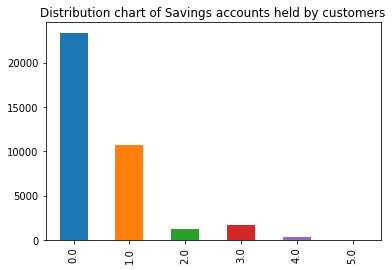

In [14]:
dAnalysisOH['savings'].value_counts().sort_index().plot(kind='bar', title='Distribution chart of Savings accounts held by customers')
print("Number of customers with Savings Account\n", dAnalysisOH['savings'].value_counts().sort_index())

#### Create a column to indicate if a customer has savings accounts or not. 0: No savings account, 1: Has savings accounts

In [15]:
dAnalysisOH['savings_N'] = dAnalysisOH['savings'].apply(lambda x: 1 if x > 0 else 0)
dAnalysisOH['savings_N'].value_counts().sort_index()

0    23380
1    14008
Name: savings_N, dtype: int64

#### Loan Accounts

Number of customers with Loan Account
 0.0    31291
1.0     5738
2.0      334
3.0       25
Name: loans, dtype: int64


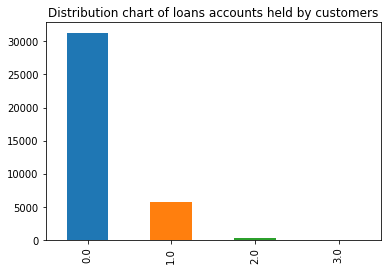

In [16]:
dAnalysisOH['loans'].value_counts().plot(kind='bar', title='Distribution chart of loans accounts held by customers')
print("Number of customers with Loan Account\n", dAnalysisOH['loans'].value_counts().sort_index())

#### Create a column to indicate if a customer has Loan accounts or not. 0: No loan account, 1: Has loan accounts

In [17]:
dAnalysisOH['loans_N'] = dAnalysisOH['loans'].apply(lambda x: 1 if x > 0 else 0)
dAnalysisOH['loans_N'].value_counts().sort_index()

0    31291
1     6097
Name: loans_N, dtype: int64

#### Investments

Number of customers with investment Account
 0.0    37188
1.0      200
Name: investments, dtype: int64


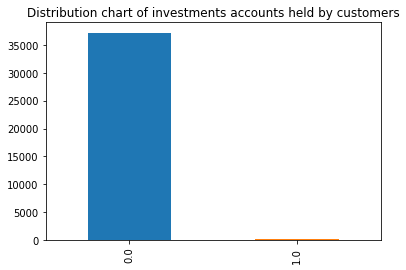

In [18]:
dAnalysisOH['investments'].value_counts().plot(kind='bar', title='Distribution chart of investments accounts held by customers')
print("Number of customers with investment Account\n", dAnalysisOH['investments'].value_counts().sort_index())

#### Current Account

Number of customers with Current Account
 0     8498
1    28890
Name: current_Accounts, dtype: int64


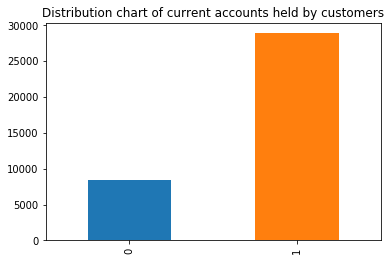

In [19]:
dAnalysisOH['current_Accounts'].value_counts().sort_index().plot(kind='bar', title='Distribution chart of current accounts held by customers')
print("Number of customers with Current Account\n", dAnalysisOH['current_Accounts'].value_counts().sort_index())

### Create the class labels

In [20]:
dAccountsType = dAnalysisOH.groupby(['savings_N','investments','loans_N','current_Accounts']).count()
dAnalysisOH['account_label'] = dAnalysisOH.apply(lambda row: row.savings_N * 8 + row.investments * 4 + row.loans_N * 2 + row.current_Accounts, axis=1 )
dAnalysisOH['account_label'].value_counts().sort_index()

1.0     18902
2.0       187
3.0      4153
4.0         1
5.0       103
7.0        34
8.0      7136
9.0      5115
10.0     1162
11.0      533
12.0        5
13.0       29
14.0        7
15.0       21
Name: account_label, dtype: int64

### As the dataset is imbalanced there is alot less investment accounts as compared to Savings, Loans and Current Account , under sampling will be performed 
We want to keep all the accounts which are for investments and it will represent 20% of the entire dataset. Therefore we should have 200 / 0.2 = 1000 records in total

In [24]:
investment_index = dAnalysisOH[(dAnalysisOH.investments== 0)].index
investmentSample = dAnalysisOH.loc[investment_index]
investmentSample.shape

(37188, 55)

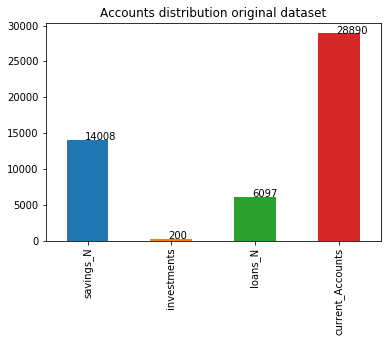

In [23]:
# Proportion of accounts in the undersampled dataset
ax = dAnalysisOH[['savings_N', 'investments','loans_N'
                         ,'current_Accounts']].sum().plot(kind='bar', title='Accounts distribution original dataset')

x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

We will randomly select other observations

In [45]:
sample_size = 800
np.random.seed(188) 
random_indices = np.random.choice(investment_index, sample_size, replace=False)
otherSample = dAnalysisOH.loc[random_indices]
otherSample.shape

(800, 55)

In [46]:
underSample = pd.concat( [otherSample, dAnalysisOH[dAnalysisOH.investments== 1]], ignore_index = True)
underSample.shape

(1000, 55)

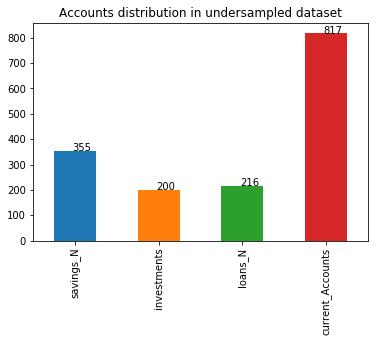

In [47]:
ax = underSample[['savings_N', 'investments','loans_N'
                  ,'current_Accounts']].sum().plot(kind='bar', title='Accounts distribution in undersampled dataset')

x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

In [50]:
underSample = underSample.drop(['savings','savings_N','investments','loans','loans_N'], axis=1)

# Data Modeling

### Lets now setup the basic SVM classifier

In [81]:
import itertools
def analyze(clf, data, classLabel):
    """
    Analyze how well a classifier performs on data.

    Parameters
    ----------
    clf : classifier object
    data : dict
    """
    # Get confusion matrix
    from sklearn import metrics
    predicted = clf.predict(data['test']['X'])
    cnf_matrix = metrics.confusion_matrix(data['test']['y'], predicted)
    
    # Get classification report
    from sklearn.metrics import classification_report
    print("classification_report matrix:\n%s" % classification_report(data['test']['y'], predicted, target_names=classLabel))

    # Get Roc curves
#    from sklearn.metrics import roc_auc_score
#    print("ROC AUC: %0.4f" % roc_auc_score(data['test']['y'], predicted))
    
    print("Accuracy: %0.4f" % metrics.accuracy_score(data['test']['y'],
                                                     predicted))
    print("Confusion matrix:\n%s" %  metrics.confusion_matrix(data['test']['y'], predicted))
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes= classLabel, title='Confusion matrix, without normalization')

    
             
    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

## Baseline Approach

The training to test set ratio will be set to 70% to 30%

In [82]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import preprocessing
#Training Set
underSample_scaled = underSample.drop(['current_Accounts'], axis=1)
underSample_scaled['gross_income'] = preprocessing.scale(underSample_scaled['gross_income'])
dAnalysisOH_scaled = dAnalysisOH.drop(['current_Accounts'], axis=1)
dAnalysisOH_scaled['gross_income'] = preprocessing.scale(dAnalysisOH_scaled['gross_income'])

In [86]:
from sklearn.model_selection import train_test_split
accountLabels = ['C1',  'C2',  'C3',  'C4', 'C5', 'C7',  'C8',  'C9', 'C10', 'C11',  'C12', 'C13', 'C14', 'C15']

#Undersampled dataset
testSize = 0
X_train, X_test, y_train, y_test = train_test_split(underSample_scaled, underSample_scaled.account_label, test_size= testSize)
testSize = 0.3 # Of the original dataset
OriX_train, X_test, Oriy_train, y_test = train_test_split(dAnalysisOH_scaled, dAnalysisOH_scaled.account_label, test_size= testSize)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


dataAccount = {'train': {'X': X_train,
                          'y': y_train},
                'test': {'X': X_test,
                         'y': y_test}}

(1000, 49) (1000,)
(11217, 49) (11217,)


In [151]:
inputSummary = X_train.describe()
inputSummary.transpose()

,count,mean,std,min,25%,50%,75%,max
customer_age,1000.0,4.004200e+01,15.871236,2.00000,28.000000,37.000000,51.000000,90.00000
customer_seniority,1000.0,3.520000e+00,1.409818,1.00000,2.000000,4.000000,5.000000,6.00000
customer_type,1000.0,1.000000e+00,0.000000,1.00000,1.000000,1.000000,1.000000,1.00000
activity_type,1000.0,9.060000e-01,0.291975,0.00000,1.000000,1.000000,1.000000,1.00000
gross_income,1000.0,1.598721e-17,1.000500,-1.10847,-0.604569,-0.240659,0.308324,10.53593
derivative_account,1000.0,1.000000e-03,0.031623,0.00000,0.000000,0.000000,0.000000,1.00000
payroll_Account,1000.0,7.600000e-02,0.265131,0.00000,0.000000,0.000000,0.000000,1.00000
junior_Account,1000.0,2.100000e-02,0.143456,0.00000,0.000000,0.000000,0.000000,1.00000
joint_account,1000.0,6.900000e-02,0.253581,0.00000,0.000000,0.000000,0.000000,1.00000
individual_Account,1000.0,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000


In [150]:
X_train.shape

(1000, 49)

In [120]:
# Linear SVM - One vs All
ovrLin = LinearSVC(C=1,multi_class='ovr', penalty='l2', random_state=8)

# One vs Rest - RBF kernel
ovoRBF = SVC(C=1.0, kernel='rbf', gamma='auto', probability = False, shrinking=True,
             tol=0.001, class_weight=None, max_iter=-1, decision_function_shape='ovr',   
             random_state=None, verbose=False)

# One vs Rest - Polynomial kernel
ovoPoly = SVC(C=1.0, kernel='poly', gamma='auto', coef0=0, probability = False
              , shrinking=True, tol=0.001, class_weight=None, max_iter=-1
              , decision_function_shape='ovr',  random_state=None, verbose=False)

### Fit the models

In [122]:
ovrLin.fit(X_train,y_train) #Fit to the LinearSVC model
ovoRBF.fit(X_train,y_train)
ovoPoly.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Confusion matrix for one vs all Linear SVM 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification_report matrix:
             precision    recall  f1-score   support

         C1       1.00      1.00      1.00      5668
         C2       0.06      0.14      0.09        56
         C3       0.96      0.99      0.97      1257
         C4       0.00      1.00      0.00         1
         C5       1.00      1.00      1.00        28
         C7       1.00      1.00      1.00         8
         C8       0.98      0.42      0.59      2129
         C9       0.63      0.98      0.77      1544
        C10       0.97      0.85      0.91       358
        C11       0.89      0.11      0.19       150
        C12       0.00      0.00      0.00         2
        C13       1.00      0.70      0.82        10
        C14       1.00      1.00      1.00         3
        C15       1.00      0.33      0.50         3

avg / total       0.93      0.86      0.87     11217

Accuracy: 0.8641
Confusion matrix:
[[5668    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   7    8

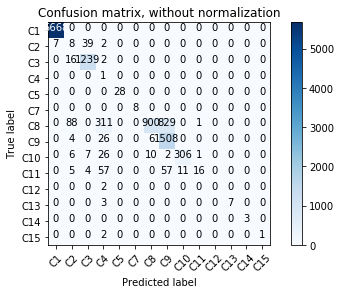

In [112]:
analyze(ovrLin,dataAccount, accountLabels)

### Confusion matrix for One vs One SVM RBF kernal

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification_report matrix:
             precision    recall  f1-score   support

         C1       0.98      1.00      0.99      5668
         C2       0.00      0.00      0.00        56
         C3       0.98      0.94      0.96      1257
         C4       0.00      0.00      0.00         1
         C5       0.97      1.00      0.98        28
         C7       1.00      0.88      0.93         8
         C8       0.81      0.72      0.76      2129
         C9       0.61      0.78      0.68      1544
        C10       0.83      0.68      0.75       358
        C11       0.00      0.00      0.00       150
        C12       0.00      0.00      0.00         2
        C13       0.77      1.00      0.87        10
        C14       1.00      1.00      1.00         3
        C15       1.00      1.00      1.00         3

avg / total       0.87      0.88      0.87     11217

Accuracy: 0.8811
Confusion matrix:
[[5666    0    0    0    0    0    2    0    0    0    0    0    0    0]
 [  36    0

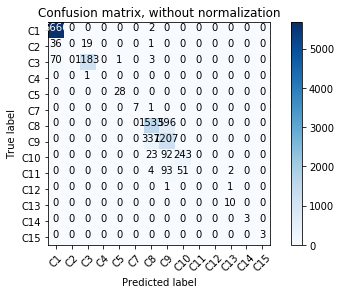

In [123]:
analyze(ovoRBF,dataAccount, accountLabels)

### Confusion matrix for One vs One SVM Polynomial kernal

classification_report matrix:
             precision    recall  f1-score   support

         C1       1.00      1.00      1.00      5668
         C2       0.43      0.27      0.33        56
         C3       0.98      0.98      0.98      1257
         C4       0.50      1.00      0.67         1
         C5       0.68      1.00      0.81        28
         C7       0.89      1.00      0.94         8
         C8       0.98      0.99      0.99      2129
         C9       0.96      0.98      0.97      1544
        C10       0.97      0.94      0.96       358
        C11       0.97      0.65      0.78       150
        C12       0.22      1.00      0.36         2
        C13       1.00      1.00      1.00        10
        C14       1.00      1.00      1.00         3
        C15       1.00      1.00      1.00         3

avg / total       0.98      0.98      0.98     11217

Accuracy: 0.9832
Confusion matrix:
[[5668    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [  18   15

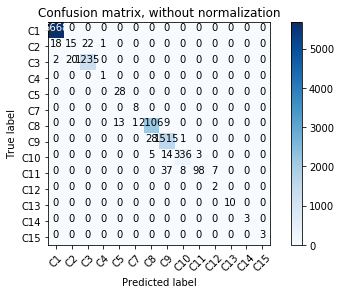

In [124]:
analyze(ovoPoly,dataAccount, accountLabels)

Based on the confusion matrix it looks like the SVM with polynomial kernel is the best performing model for identifying the accounts which a customer will hold. 

# Proposed approach
For linear SVC we will use dual = False to indicate we are to solve for the primal optimization problem. 

In [130]:
# One vs All
ovrLin = LinearSVC(C=10,multi_class='ovr', penalty='l2',class_weight=None, random_state=8
                  , dual = False)

classification_report matrix:
             precision    recall  f1-score   support

         C1       1.00      1.00      1.00      5668
         C2       0.54      0.23      0.33        56
         C3       0.96      0.99      0.98      1257
         C4       0.33      1.00      0.50         1
         C5       1.00      1.00      1.00        28
         C7       1.00      1.00      1.00         8
         C8       0.99      0.99      0.99      2129
         C9       0.97      0.99      0.98      1544
        C10       0.96      0.91      0.94       358
        C11       0.86      0.63      0.73       150
        C12       1.00      0.50      0.67         2
        C13       0.83      1.00      0.91        10
        C14       1.00      1.00      1.00         3
        C15       0.43      1.00      0.60         3

avg / total       0.98      0.98      0.98     11217

Accuracy: 0.9842
Confusion matrix:
[[5668    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   5   13

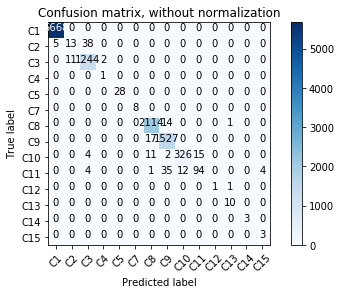

In [131]:
ovrLin.fit(X_train,y_train) #Fit to the LinearSVC model
analyze(ovrLin,dataAccount, accountLabels)

There is a marked improvement in accuracy after solving for the max optimization issue

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification_report matrix:
             precision    recall  f1-score   support

         C1       0.99      1.00      1.00      5668
         C2       0.00      0.00      0.00        56
         C3       0.97      0.99      0.98      1257
         C4       0.00      0.00      0.00         1
         C5       0.85      1.00      0.92        28
         C7       1.00      1.00      1.00         8
         C8       0.99      0.99      0.99      2129
         C9       0.98      0.99      0.99      1544
        C10       0.88      0.98      0.93       358
        C11       1.00      0.58      0.73       150
        C12       0.12      0.50      0.20         2
        C13       0.83      1.00      0.91        10
        C14       1.00      1.00      1.00         3
        C15       1.00      1.00      1.00         3

avg / total       0.98      0.98      0.98     11217

Accuracy: 0.9844
Confusion matrix:
[[5667    0    0    0    1    0    0    0    0    0    0    0    0    0]
 [  24    0

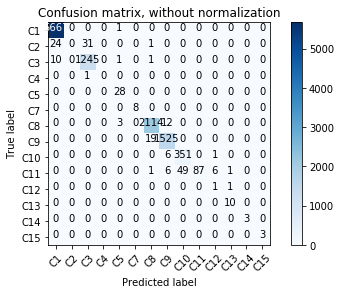

In [143]:
# One vs Rest - RBF kernel
ovoRBF = SVC(C=10.0, kernel='rbf', gamma=.01, probability = False, shrinking=True,
             tol=0.001, class_weight=None, max_iter=-1, decision_function_shape='ovr',   
             random_state=None, verbose=False)

ovoRBF.fit(X_train,y_train)
analyze(ovoRBF,dataAccount, accountLabels)

classification_report matrix:
             precision    recall  f1-score   support

         C1       1.00      1.00      1.00      5668
         C2       0.47      0.29      0.36        56
         C3       0.98      0.99      0.99      1257
         C4       1.00      1.00      1.00         1
         C5       1.00      1.00      1.00        28
         C7       1.00      1.00      1.00         8
         C8       1.00      1.00      1.00      2129
         C9       0.97      1.00      0.98      1544
        C10       0.97      0.94      0.95       358
        C11       0.97      0.67      0.79       150
        C12       0.25      1.00      0.40         2
        C13       1.00      1.00      1.00        10
        C14       1.00      1.00      1.00         3
        C15       1.00      1.00      1.00         3

avg / total       0.99      0.99      0.99     11217

Accuracy: 0.9880
Confusion matrix:
[[5668    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [  21   16

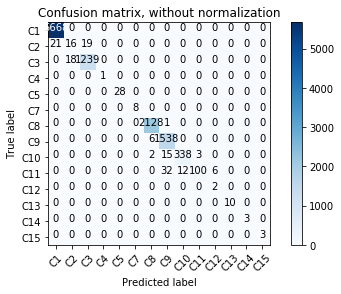

In [147]:
# One vs Rest - Polynomial kernel
ovoPoly = SVC(C=1.0, kernel='poly', degree=3,  gamma='auto', coef0=0, probability = False
              , shrinking=True, tol=0.001, class_weight=None, max_iter=-1
              , decision_function_shape='ovr',  random_state=None, verbose=False)

ovoPoly.fit(X_train,y_train)
analyze(ovoPoly,dataAccount, accountLabels)